# Tim Hortons Employee Review

In [2]:
import pandas as pd 
import numpy as np

In [3]:
df = pd.read_excel('takehome-sample-2019-09-17.xlsx')

In [3]:
df.head()

,Unnamed: 0,Rating,Title,Body,Job Title,Location,Date,Rating - Job Work/Life Balance,Rating - Salary/Benefits,Rating - Job Security/Advancement,Rating - Management,Rating - Job Culture,Employment Status
0,0,4,Fast pace clean work environment that required...,I worked as a morning baker that prepared brea...,Baker,"Newmarket, ON",21 January 2019,4,2,3,5,4,Former Employee
1,1,5,Great workplace,"Fun serving guests everyday with a smile, most...",Food Counter Attendant,"Edmonton, AB",8 May 2019,0,0,0,0,0,Former Employee
2,2,5,Great Atmosphere,"Management is amazing, as well as my co-worker...",Team Member,"St. Catharines, ON",8 May 2019,5,5,5,5,5,Current Employee
3,3,1,Very Bad Place to Work,The Tim Horton's I worked at cut all benefits ...,Store Front,"Kitchener, ON",8 May 2019,1,1,1,1,1,Former Employee
4,4,4,fun fast paced,"Picky with scheduling, never got mon-fri as i ...",Baker,"Ottawa, ON",8 May 2019,3,3,5,3,4,Former Employee


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13020 entries, 0 to 13019
Data columns (total 13 columns):
Unnamed: 0                           13020 non-null int64
Rating                               13020 non-null int64
Title                                13018 non-null object
Body                                 13020 non-null object
Job Title                            13020 non-null object
Location                             13020 non-null object
Date                                 13020 non-null object
Rating - Job Work/Life Balance       13020 non-null int64
Rating - Salary/Benefits             13020 non-null int64
Rating - Job Security/Advancement    13020 non-null int64
Rating - Management                  13020 non-null int64
Rating - Job Culture                 13020 non-null int64
Employment Status                    13018 non-null object
dtypes: int64(7), object(6)
memory usage: 1.3+ MB


In [4]:
## Drop this column 
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Rating,Title,Body,Job Title,Location,Date,Rating - Job Work/Life Balance,Rating - Salary/Benefits,Rating - Job Security/Advancement,Rating - Management,Rating - Job Culture,Employment Status
0,4,Fast pace clean work environment that required...,I worked as a morning baker that prepared brea...,Baker,"Newmarket, ON",21 January 2019,4,2,3,5,4,Former Employee
1,5,Great workplace,"Fun serving guests everyday with a smile, most...",Food Counter Attendant,"Edmonton, AB",8 May 2019,0,0,0,0,0,Former Employee
2,5,Great Atmosphere,"Management is amazing, as well as my co-worker...",Team Member,"St. Catharines, ON",8 May 2019,5,5,5,5,5,Current Employee
3,1,Very Bad Place to Work,The Tim Horton's I worked at cut all benefits ...,Store Front,"Kitchener, ON",8 May 2019,1,1,1,1,1,Former Employee
4,4,fun fast paced,"Picky with scheduling, never got mon-fri as i ...",Baker,"Ottawa, ON",8 May 2019,3,3,5,3,4,Former Employee


### Cleaning up data

In [6]:
df['Employment Status'].value_counts()

Former Employee     9158
Current Employee    3738
Part-time             26
Full-time              7
Part Time              6
                    ... 
P/T                    1
e                      1
Customer Service       1
full-time              1
stage                  1
Name: Employment Status, Length: 69, dtype: int64

#### - Only want former and current employees

In [5]:
# we only want former and current empoyees 
x = df[df['Employment Status']=='Current Employee']
y = df[df['Employment Status']=='Former Employee']


In [6]:
df = pd.concat([x,y],axis=0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12896 entries, 2 to 13019
Data columns (total 12 columns):
Rating                               12896 non-null int64
Title                                12894 non-null object
Body                                 12896 non-null object
Job Title                            12896 non-null object
Location                             12896 non-null object
Date                                 12896 non-null object
Rating - Job Work/Life Balance       12896 non-null int64
Rating - Salary/Benefits             12896 non-null int64
Rating - Job Security/Advancement    12896 non-null int64
Rating - Management                  12896 non-null int64
Rating - Job Culture                 12896 non-null int64
Employment Status                    12896 non-null object
dtypes: int64(6), object(6)
memory usage: 1.3+ MB


In [11]:
# Lots of data in french 
df['Job Title']

2                   Team Member
8                    Supervisor
10       Service à la clientèle
11            Part-time Cashier
12                 Superviseure
                  ...          
13014       Tim Hortons Cashier
13015          Customer Service
13016                   Cashier
13018    Food Counter Attendant
13019               Store Front
Name: Job Title, Length: 12896, dtype: object

In [8]:
from langdetect import detect

In [9]:
def lang_fr(x):
    if detect(x) == 'fr':
        return 'fr'
    else:
        return 'en'

In [10]:
df['lang'] = df['Job Title'].apply(lambda x: lang_fr(x))

In [11]:
df['lang'].value_counts()

en    11993
fr      903
Name: lang, dtype: int64

In [19]:
df_fr = df[df['lang'] == 'fr']

In [26]:
df_fr['lang'] = df_fr['Job Title'].apply(lambda x: lang_fr(x))

/Users/samihasimran/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
df_fr['lang'].value_counts()

fr    792
en    111
Name: lang, dtype: int64

In [29]:
# Separate into two datasets, one containing french and one containing english 
df_fr_fr = df_fr[df_fr['lang']=='fr']
df_fr_en = df_fr[df_fr['lang']=='en']

In [30]:
df_fr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 903 entries, 10 to 12941
Data columns (total 13 columns):
Rating                               903 non-null int64
Title                                903 non-null object
Body                                 903 non-null object
Job Title                            903 non-null object
Location                             903 non-null object
Date                                 903 non-null object
Rating - Job Work/Life Balance       903 non-null int64
Rating - Salary/Benefits             903 non-null int64
Rating - Job Security/Advancement    903 non-null int64
Rating - Management                  903 non-null int64
Rating - Job Culture                 903 non-null int64
Employment Status                    903 non-null object
lang                                 903 non-null object
dtypes: int64(6), object(7)
memory usage: 98.8+ KB


In [32]:
df_en = df[df['lang'] == 'en']

In [34]:
df_en = pd.concat([df_fr_en,df_en],axis=0)

##### Disclaimer: There were many attempts to translate the data from french to english but there too many technical difficulties and it led to the whole notebook freezing so unfortunately I chose to leave that 7% of data out

In [41]:
df_fr_fr.to_excel(r'/Users/samihasimran/Documents/takehomeassignment\df_fr_fr.xlsx')

In [587]:
# Looking at unique values, put them into the different categories
df_en.loc[df_en['Job Title'].str.contains('Student'), 'Job Title'] = 'Team Member' 

In [594]:
df_en.loc[~df_en['Job Title'].isin(['Team Member','Supervisor','Kitchen','Manager','Office','Maintainence']), 'Job Title'] = 'Other'

In [597]:
df_en.describe()
# The lowest in ratings != 'Rating' is 0, this could be because some people have not voted for those columns 

,Rating,Rating - Job Work/Life Balance,Rating - Salary/Benefits,Rating - Job Security/Advancement,Rating - Management,Rating - Job Culture
count,12104.000000,12104.000000,12104.000000,12104.000000,12104.000000,12104.000000
mean,3.713896,3.342531,2.860212,3.085344,3.058163,3.259914
std,1.134375,1.513111,1.508671,1.558171,1.605191,1.567673
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000
50%,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000
75%,5.000000,5.000000,4.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [616]:
# There are 907 people who did not leave a rating for the 5 columns
no_rat = df_en[(df_en['Rating - Job Culture'] == 0) & (df_en['Rating - Job Security/Advancement']==0) 
         & (df_en['Rating - Job Work/Life Balance']==0) & (df_en['Rating - Management']==0)
             & (df_en['Rating - Salary/Benefits']==0) & (df_en['Rating']!=0)]

In [630]:
# We will take an average rating of all the columns

ratings = pd.concat([df_en.iloc[:,6:11],df_en.iloc[:,0:1]],axis=1)
df_en['ave_rating'] = ratings.mean(axis=1).round(2)

In [631]:
df_en.head()

,Rating,Title,Body,Job Title,Location,Date,Rating - Job Work/Life Balance,Rating - Salary/Benefits,Rating - Job Security/Advancement,Rating - Management,Rating - Job Culture,Employment Status,lang,ave_rating
224,5,it is great job!!!!,I love working at Tim Hortons because It helps...,Supervisor,"Buffalo, NY",9 April 2019,5,5,5,5,5,Current Employee,en,5.00
1269,5,Tim Hortons experience,"Working fast pace, Tills and having amazing cu...",Supervisor,"Cambridge, ON",4 November 2018,5,4,5,5,5,Current Employee,en,4.83
1549,3,Good place to work for first time employment,This Company is a good place to work if you ar...,Supervisor,"Glencoe, ON",21 September 2018,3,3,2,3,4,Current Employee,en,3.00
2519,3,you learned a lot of things,meet different kinds of peoplegood relationshi...,Supervisor,"Calgary, AB",13 May 2018,3,2,2,3,3,Current Employee,en,2.67
2817,5,Rewarding and Challenging,Working at Tim Horton's has presented me with ...,Supervisor,"Niagara Falls, ON",11 April 2018,5,4,4,5,4,Current Employee,en,4.50


In [635]:
df_en['ave_rating'] = np.where(df_en['ave_rating']<1, df_en['Rating'],df_en['ave_rating'])

In [700]:
df_en['Job Title'].value_counts()

Team Member     8759
Supervisor      1507
Kitchen          769
Manager          626
Other            372
Office            40
Maintainence      31
Name: Job Title, dtype: int64

In [717]:
df_clean = df_en

In [718]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [719]:
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet



In [721]:
# (source: https://towardsdatascience.com/detecting-bad-customer-reviews-with-nlp-d8b36134dc7e)
def wn_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [722]:
# (source: https://towardsdatascience.com/detecting-bad-customer-reviews-with-nlp-d8b36134dc7e)
def clean_text(text):
    # convert sentence to lowercase 
    
    text = text.lower()
    
    #tokenize text and remove punctuation 
    
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    
    #remove words that have any numbers 
    
    text = [word for word in text if not any(c.isdigit() for c in word)]
    
    #remove stop words
    
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    
    #remove empty tokens
    
    text = [t for t in text if len(t) >0]
    
    # pos tag text
    pos_tags = pos_tag(text)
    
    #lemmatize text 
    text = [WordNetLemmatizer().lemmatize(t[0], wn_pos(t[1])) for t in pos_tags]
    
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    
    # join all
    text = " ".join(text)
    return(text)

In [723]:
df_clean['Body_clean'] = df_clean['Body'].apply(lambda x: clean_text(x))


In [733]:
df_clean['Body'][1]

"Fun serving guests everyday with a smile, most times it doesn't even feel like a job and it's a pleasure helping others knowing I made a difference in their day."

In [734]:
df_clean['Body_clean'][1]

'fun serve guest everyday smile time even feel like job pleasure help others know make difference day'

#### Finding polarity scores of the body 

In [735]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [736]:
analyser = SentimentIntensityAnalyzer()

In [737]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print((score))

In [738]:
sentiment_analyzer_scores('fun serve guest everyday smile time even feel like job pleasure help others know make difference day')

{'neg': 0.0, 'neu': 0.449, 'pos': 0.551, 'compound': 0.9287}


In [739]:
def sent_anal_pos(sent):
    return analyser.polarity_scores(sent)['pos']

def sent_anal_neg(sent):
    return analyser.polarity_scores(sent)['neg']

def sent_anal_neu(sent):
    return analyser.polarity_scores(sent)['neu']

In [740]:
df_clean['polarity_pos'] = df_clean['Body_clean'].apply(lambda x: sent_anal_pos(x))

In [741]:
df_clean['polarity_neg'] = df_clean['Body_clean'].apply(lambda x: sent_anal_neg(x))
df_clean['polarity_neu'] = df_clean['Body_clean'].apply(lambda x: sent_anal_neu(x))

In [747]:
df_clean[df_clean['polarity_pos'] >= 0.8]

,Rating,Title,Body,Job Title,Location,Date,Rating - Job Work/Life Balance,Rating - Salary/Benefits,Rating - Job Security/Advancement,Rating - Management,Rating - Job Culture,Employment Status,lang,ave_rating,Body_clean,polarity_pos,polarity_neg,polarity_neu
4595,3,fun and productive,happy environment. im happy and well treated. ...,Manager,"Rosetown, SK",23 September 2017,4,4,4,4,4,Current Employee,en,3.83,happy environment im happy well treated employ...,0.806,0.0,0.194
8720,5,Tim hortons is awesome,"I love working there is fun, competitive, and ...",Kitchen,"Winnipeg, MB",8 April 2016,5,5,5,5,5,Current Employee,en,5.00,love work fun competitive awesome place work c...,0.811,0.0,0.189
11836,5,Exellent,"This place is awesome, they are very fast and ...",Supervisor,"Fergus, CA",19 August 2013,5,5,5,5,5,Current Employee,en,5.00,place awesome fast friendly super nice polite ...,0.853,0.0,0.147
10457,5,"Awesome job, awesome hours.",Treated very well and awesome hours I really l...,Other,"Langley, BC",7 January 2015,0,0,0,0,0,Former Employee,en,5.00,treat well awesome hour really love job,0.817,0.0,0.183
10802,5,Nice fast pace job,"Loved the job nice work place, great loyal fri...",Team Member,"Dearborn, MI",2 September 2014,5,5,5,4,5,Former Employee,en,4.83,love job nice work place great loyal friendly ...,0.813,0.0,0.187
11106,3,Tim Hortons,"It was good at first. And I did love it, I jus...",Team Member,"Greater Napanee, ON",14 May 2014,3,2,3,2,2,Former Employee,en,2.50,good first love wish good management,0.864,0.0,0.136
11439,5,productive environment to work in and id work ...,loved it great employees and very clean and aw...,Team Member,"Calgary, AB",26 January 2014,5,5,5,5,5,Former Employee,en,5.00,love great employee clean awesome customer,0.883,0.0,0.117
11573,5,I loved my job,"over all I loved greeting the customers, and m...",Kitchen,"Kelowna, BC",1 December 2013,5,4,5,5,5,Former Employee,en,4.83,love greeting customer make sure satisfy every...,0.801,0.0,0.199


In [759]:
sentiment_analyzer_scores('Overall, an amazing experience, loved every minute of it!')

{'neg': 0.0, 'neu': 0.467, 'pos': 0.533, 'compound': 0.8398}


In [760]:
sentiment_analyzer_scores('Overall, a disgusting experience, hated every minute of it')

{'neg': 0.559, 'neu': 0.441, 'pos': 0.0, 'compound': -0.8225}


In [757]:
sentiment_analyzer_scores('It was alright, I guess, nothing special')

{'neg': 0.273, 'neu': 0.484, 'pos': 0.242, 'compound': -0.0665}


### Exploratory Data Analysis

#### Aim is to create a table that shows job titles and shows the percentage of them having a good, neutral, bad experience 

In [830]:
exp_by_jt.columns

Index(['Job Title', 'Bad Experience', 'Neutral Experience', 'Good Experience'], dtype='object')

In [834]:
cols = ['Bad Experience', 'Neutral Experience', 'Good Experience']
exp_by_jt[cols] = exp_by_jt[cols].div(exp_by_jt[cols].sum(axis=1),axis=0).multiply(100).round(2)

In [835]:
exp_by_jt

,Job Title,Bad Experience,Neutral Experience,Good Experience
0,Team Member,17.87,29.18,52.95
1,Supervisor,16.66,27.01,56.34
2,Kitchen,19.64,30.17,50.20
3,Management,17.73,26.68,55.59
4,Other,18.28,28.76,52.96
5,Office,15.00,25.00,60.00
6,Maintenance,12.90,22.58,64.52


In [837]:
## Separate into current and former employees
df_clean_cur = df_clean[df_clean['Employment Status'] == 'Current Employee']
df_clean_for = df_clean[df_clean['Employment Status'] == 'Former Employee']

In [845]:
print(df_clean_cur[df_clean_cur['ave_rating'] <2.5]['Job Title'].value_counts().tolist())
print(df_clean_cur[(df_clean_cur['ave_rating'] < 3.5) & (df_clean_cur['ave_rating'] >= 2.5)]['Job Title'].value_counts().tolist())
print(df_clean_cur[df_clean_cur['ave_rating'] >=3.5]['Job Title'].value_counts().tolist())

[328, 66, 40, 33, 17, 1]
[692, 161, 65, 62, 21, 4, 2]
[1354, 328, 147, 127, 57, 7, 4]


In [846]:
print(df_clean_for[df_clean_for['ave_rating'] <2.5]['Job Title'].value_counts().tolist())
print(df_clean_for[(df_clean_for['ave_rating'] < 3.5) & (df_clean_for['ave_rating'] >= 2.5)]['Job Title'].value_counts().tolist())
print(df_clean_for[df_clean_for['ave_rating'] >=3.5]['Job Title'].value_counts().tolist())

[1237, 185, 111, 78, 51, 5, 4]
[1864, 246, 167, 105, 86, 6, 5]
[3284, 521, 259, 201, 140, 17, 16]


In [854]:
rating_by_jt_cur = {'Job Title':['Team Member','Supervisor','Kitchen','Management','Other','Office','Maintenance'],
                'Bad Experience': [328, 66, 40, 33, 17, 1,0],
               'Neutral Experience':[692, 161, 65, 62, 21, 4, 2],
               'Good Experience':[1354, 328, 147, 127, 57, 7, 4]}

In [848]:
rating_by_jt_for = {'Job Title':['Team Member','Supervisor','Kitchen','Management','Other','Office','Maintenance'],
                'Bad Experience': [1237, 185, 111, 78, 51, 5, 4],
               'Neutral Experience':[1864, 246, 167, 105, 86, 6, 5],
               'Good Experience':[3284, 521, 259, 201, 140, 17, 16]}

In [855]:
exp_by_jt_cur = pd.DataFrame(rating_by_jt_cur)
exp_by_jt_for = pd.DataFrame(rating_by_jt_for)

In [859]:
# Turning them into percentages 
cols = ['Bad Experience', 'Neutral Experience', 'Good Experience']
exp_by_jt_cur[cols] = exp_by_jt_cur[cols].div(exp_by_jt_cur[cols].sum(axis=1),axis=0).multiply(100).round(2)
exp_by_jt_for[cols] = exp_by_jt_for[cols].div(exp_by_jt_for[cols].sum(axis=1),axis=0).multiply(100).round(2)

In [858]:
exp_by_jt_cur

,Job Title,Bad Experience,Neutral Experience,Good Experience
0,Team Member,13.82,29.15,57.03
1,Supervisor,11.89,29.01,59.10
2,Kitchen,15.87,25.79,58.33
3,Management,14.86,27.93,57.21
4,Other,17.89,22.11,60.00
5,Office,8.33,33.33,58.33
6,Maintenance,0.00,33.33,66.67


In [860]:
exp_by_jt_for

,Job Title,Bad Experience,Neutral Experience,Good Experience
0,Team Member,19.37,29.19,51.43
1,Supervisor,19.43,25.84,54.73
2,Kitchen,20.67,31.10,48.23
3,Management,20.31,27.34,52.34
4,Other,18.41,31.05,50.54
5,Office,17.86,21.43,60.71
6,Maintenance,16.00,20.00,64.00


In [889]:
df_clean_for[(df_clean_for['ave_rating']< 2) & (df_clean_for['Job Title']=='Kitchen')]['Body']

95       If you want to reconsider your life work at Ti...
213      you're not treated fairly and will be overwork...
305      The manager was very rude and only trained me ...
367      It is a very bad place to work at if you have ...
473      Most of the coworkers were good to work with w...
                               ...                        
12100    This job was the perfect example of how the at...
12340    I liked working for the Tim Hortons company ve...
12472    And from my experience in Kingston, its pretty...
12866    Because I use to work there long time ago befo...
12955    - worked very hard here with little or no enth...
Name: Body, Length: 63, dtype: object

#### NOTE: these two tables were merged in Microsoft Excel

In [890]:
# WordCloud 
from wordcloud import WordCloud

In [891]:
# source : https://towardsdatascience.com/detecting-bad-customer-reviews-with-nlp-d8b36134dc7e
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

In [909]:
# Polarity Scores of reviews 


In [938]:
def sent_anal_com(sent):
    return analyser.polarity_scores(sent)['compound']



In [939]:
## positive: compound [0.5,1]
## neutral: compound (-0.5,0.5)
## negative: compound [-1,-0.5]

df_clean['polarity_compound'] = df_clean['Body_clean'].apply(lambda x: sent_anal_com(x))

In [953]:
print(df_clean[(df_clean['Employment Status'] == 'Current Employee') & (df_clean['polarity_compound'] >= 0.05)]['Job Title'].value_counts())
print(df_clean[(df_clean['Employment Status'] == 'Current Employee') & (df_clean['polarity_compound'] <= -0.05)]['Job Title'].value_counts())
print(df_clean[(df_clean['Employment Status'] == 'Current Employee') & (df_clean['polarity_compound'] < 0.05) & (df_clean['polarity_compound'] > -0.05)]['Job Title'].value_counts())

Team Member    2067
Supervisor      488
Management      201
Kitchen         181
Other            72
Office           10
Maintenance       6
Name: Job Title, dtype: int64
Team Member    213
Supervisor      48
Kitchen         33
Management      32
Other           10
Office           1
Name: Job Title, dtype: int64
Team Member    94
Supervisor     19
Kitchen        18
Other          13
Management      9
Office          1
Name: Job Title, dtype: int64


In [952]:
print(df_clean[(df_clean['Employment Status'] == 'Former Employee') & (df_clean['polarity_compound'] >= 0.05)]['Job Title'].value_counts())
print(df_clean[(df_clean['Employment Status'] == 'Former Employee') & (df_clean['polarity_compound'] <= -0.05)]['Job Title'].value_counts())
print(df_clean[(df_clean['Employment Status'] == 'Former Employee') & (df_clean['polarity_compound'] < 0.05) & (df_clean['polarity_compound'] > -0.05)]['Job Title'].value_counts())

Team Member    5382
Supervisor      808
Kitchen         431
Management      335
Other           219
Office           22
Maintenance      20
Name: Job Title, dtype: int64
Team Member    730
Supervisor     107
Kitchen         61
Management      35
Other           30
Maintenance      4
Office           2
Name: Job Title, dtype: int64
Team Member    273
Kitchen         45
Supervisor      37
Other           28
Management      14
Office           4
Maintenance      1
Name: Job Title, dtype: int64


#### NOTE: These two outputs were turned into a merged table using Microsoft Excel

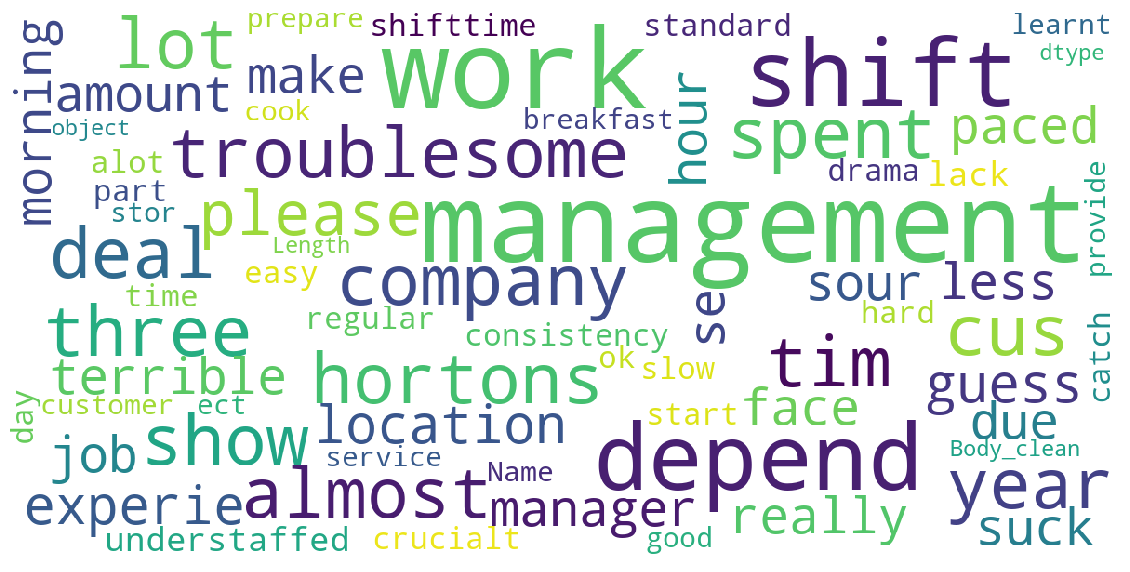

In [962]:
## Wordcloud for 'bad experience' and 'current employee'

show_wordcloud(df_clean[(df_clean['ave_rating']<2.5) & (df_clean['Employment Status']=='Current Employee')]['Body_clean'] )

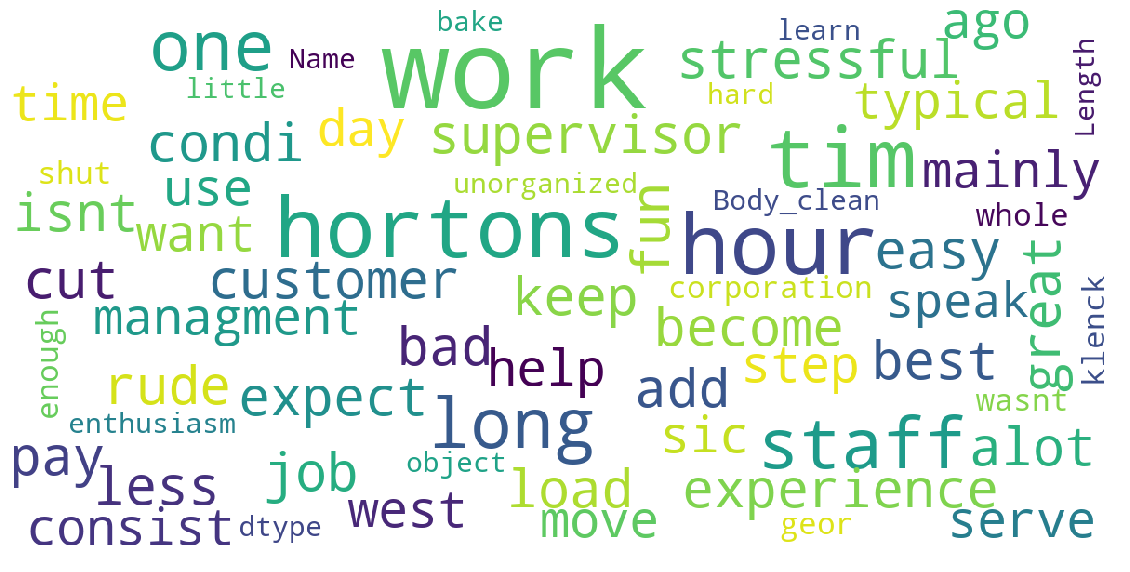

In [967]:
## Wordcloud for 'bad experience' and 'kitchen staff'

show_wordcloud(df_clean[(df_clean['ave_rating']<2.5) &(df_clean['Job Title']=='Kitchen')]['Body_clean'] )

In [973]:
df_clean[(df_clean['Body'].str.contains('hour')) & (df_clean['Job Title'] == 'Kitchen') & (df_clean['ave_rating']<2.5)]['Body']

217      My experience at tim hortons hasn't been the b...
558      kept adding more and more to work load and exp...
4096     The constant stresses of this company aren't f...
4285     Work is fast paced, non stop work. Every momen...
4400     The only reason I have remained at this compan...
5350     Being an autistic woman who lives at home and ...
6335     Worked there for two yearsStaff would often le...
10532    -lack of hours, no team work, low pay, managem...
10918    I have been working at Tim Hortons for 4 years...
276      i was not a fan of working at tim hortans. the...
305      The manager was very rude and only trained me ...
640      8 hour shift providing ultimate customer satis...
979      Working here is fine if you understand what yo...
1105     This is a job that you want to get to hold you...
1228     Flexible shifts for the most part they would g...
1999     Always understaffed or poorly staffed Always b...
2038     I worked there for over a year. I started on f.

In [985]:
print(df_clean.loc[558].Body)
print(df_clean.loc[276].Body)

kept adding more and more to work load and expecting you to do it for less hours. and the managment was  poor at best. careless and angry employees too
i was not a fan of working at tim hortans. they dont respect hours and when it came to overtime pay  they would fight on it. good people but poor management.


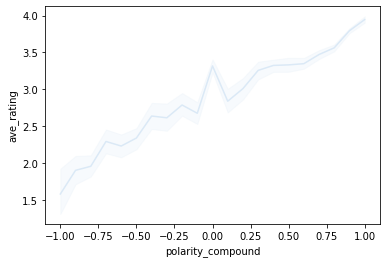

In [1005]:
sns.color_palette('deep')
sns.lineplot(x=df_clean['polarity_compound'].round(1),y=df_clean['ave_rating'].round(1))

In [997]:
df_clean['polarity_compound'].round(2).corr(df_clean['ave_rating'].round(2))

0.3970842854799192